In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  4 10:54:08 2018
@author: AndiGabi

"""

"""
Machine Learning Problem Solving: 
Implementing Linear Regression with one varible

This exercise based on Andrew NG: Machine Learning Coursera week2 assignment, which could only solved in MATLAB or OCTAVE.
I used this exercise to code the solution completely in Python.

Suppose we are the CEO of a food truck restaurant franchise and are considering
different cities for opening a new outlet. The chain already has trucks in 
various cities and we have data for profits and populations from the cities.

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Load data1 from txt file:
#data1.txt file stores population size in 10,000s and profit in $10,000s

data1 = pd.read_csv("data1.txt", header = None)


In [4]:
data1.head()


,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Plotting training set


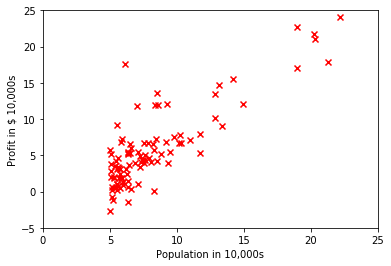

In [5]:
X = data1.iloc[:,0] #this is the population
y = data1.iloc[:,1] #this is the profit
m = len(y) #number of training example

print("Plotting training set")

plt.scatter(X, y, marker="x", c="red")
plt.ylabel("Profit in $ 10,000s")
plt.xlabel("Population in 10,000s")
ax=plt.gca()
ax.axis([0, 25, -5, 25])

plt.show()


In [6]:
#Computing cost function

# J(theta) = 1 / (2m) * sum( (h(X) - y)^2 ) 
# where our hypothesis function h(X) is the folloing:
# h(X) = theta0 + theta1*X1
# which is equally to
# h(X) = theta * X
# just remember, X0 = 1 for every training example

X_matrix = np.vstack( (np.ones(m), np.array(X))) #add a column of ones to X, and make a matrix of it 
y_vector = np.array(y) #set as a vector our dataframe
theta = np.zeros(2) #initializing theta, which is a vector


def computeCost(X, y, theta):
    m = len(y)
    h = theta.dot(X) #this is the matrix multiplication
    cost = ((h-y)**2).sum()/2/m
    return cost

cost=computeCost(X_matrix, y_vector, theta)

print ("In case of theta {1} the cost is {0:.2f}.". format(cost, theta))


In case of theta [ 0.  0.] the cost is 32.07.


In [7]:

print("We are minimizing our cost function by implementing Gradient Descent")

# theta(j) = theta (j) - alpha * (1/m) * sum ( (h(X) - y)* X(j) )
# this must be updated simultanously for every theta. 
# theta(j) and X(j) refers the jth variable in the hypothesis function

def gradientDescent(X, y, theta, alpha, max_iter=1500):
    m = len(y)
    cost = computeCost(X, y, theta)
    cost_history = [cost]
    i = 0
    while True:
        if i >= max_iter: break
        theta = theta - alpha * (1/m) * ( (theta.dot(X) - y)*X).sum(axis=1)
        cost_new = computeCost(X, y, theta)
        cost_history.append(cost_new)
        if cost - cost_new < 0.000001: break
        else: 
            cost = cost_new
            i +=1
    
    return theta, cost_history
    


We are minimizing our cost function by implementing Gradient Descent


In [8]:
#Lets initialize parameters:
alpha = 0.01
theta = np.zeros(2)
#Lets calculate the theta optimum
theta, cost_history = gradientDescent(X_matrix, y_vector, theta, alpha)

print ("Gradient descent resulted a theta of {} using alpha = {}.". format(theta, alpha))
print ("Implementing these parameters our cost is {0:.2f}.".format(cost_history[-1]))


Gradient descent resulted a theta of [-3.63029144  1.16636235] using alpha = 0.01.
Implementing these parameters our cost is 4.48.


Plotting cost history of gradient descent


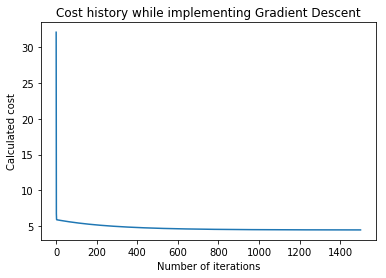

In [9]:
print ("Plotting cost history of gradient descent")

#Lets plot our cost history
plt.plot(cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Calculated cost")
plt.title("Cost history while implementing Gradient Descent")
plt.show()



Plotting the hypothesis on our trainin set


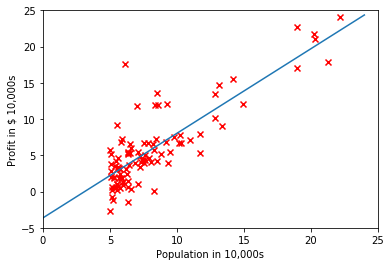

In [10]:
print ("Plotting the hypothesis on our trainin set")

#Lets plot the hypothesis function
x = np.vstack( [np.ones(25), np.arange(0,25,1)])
hypothesis = theta@x   
plt.scatter(X, y, marker="x", c="red")
plt.plot(hypothesis)
plt.ylabel("Profit in $ 10,000s")
plt.xlabel("Population in 10,000s")
ax=plt.gca()
ax.axis([0, 25, -5, 25])

plt.show()


In [11]:

#Lets estimate profit for cities with specific population:
population_1 = 35000
x_1 = np.array([1,population_1/10000])
profit_1 = theta @ x_1 * 10000

print("In the city with population = {} the estimated profit would be {:.2f}.".format(population_1, profit_1))

population_2 = 70000
x_2 = np.array([1,population_2/10000])
profit_2 = theta @ x_2 * 10000

print("In the city with population = {} the estimated profit would be {:.2f}.".format(population_2, profit_2))



In the city with population = 35000 the estimated profit would be 4519.77.
In the city with population = 70000 the estimated profit would be 45342.45.


Plotting the 3D cost function


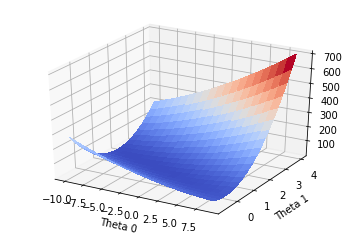

In [12]:

#Lets plot the cost function in 3D
print("Plotting the 3D cost function")



theta0_vals = np.arange(-10, 10, 1)
theta1_vals = np.arange(4, -1, -0.25)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j]=computeCost(X_matrix, y_vector, t.T)

J_vals = J_vals.T
theta0_vals, theta1_vals =np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel("Theta 0")
plt.ylabel("Theta 1")
plt.show()
